#  Problematic Reports Regarding Errors

---

>You will know how to answer the following questions at the end of this notebook.
>- [x] What is a problematic report regarding errors?

In [84]:
import pandas as pd
import glob
import os

#### Loading the active reports dataset

In [85]:
active_reports = pd.read_csv("../../datasets/active_reports.csv")

#### Loading the Lightning Error datasets

In [86]:
lightning_error = pd.read_csv("../../data/ELF-v4/errors/LightningError_newlogs.csv")
lightning_error.head(10)

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,PAGE_ENTITY_TYPE,PAGE_CONTEXT,PAGE_URL,PAGE_APP_NAME,COMPONENT_NAME,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,ReportId,ReportType
0,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.497Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
1,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.502Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
2,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.504Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
3,LightningError,2.022063e+13,TID:26489164000008ad24,00D0b000000GaMp,0050b000004QTRm,NaN,PDdNaapMUYygUmnd,5CkowkBUfnh50w5r,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000000wJS...,LightningService,NaN,2022-06-28T01:15:09.829Z,0050b000004QTRmAAO,143.166.255.115,5706P000000wJSFQA2,LiveChatTranscript
4,LightningError,2.022063e+13,TID:816206330000072904,00D0b000000GaMp,0050b000004KM0q,NaN,LXICh6ym15MdDnlC,mKQ4IAkKyOElfAAV,Standard,one:one,...,Report,reports:reportBase,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,LightningService,NaN,2022-06-28T01:17:00.510Z,0050b000004KM0qAAG,137.69.117.202,00O2R000004AmwmUAC,Report
5,LightningError,2.022063e+13,TID:380300900000d10de3,00D0b000000GaMp,0052R000009TllQ,NaN,440EhLGtLXfjsz9e,6v7A3DkVdhpe+xqh,Standard,one:one,...,Case,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P0000066liDQAQ/view,LightningService,NaN,2022-06-28T01:17:28.109Z,0052R000009TllQQAS,182.76.130.43,5006P0000066liDQAQ,Case
6,LightningError,2.022063e+13,TID:6193718390000fa688,00D0b000000GaMp,0050b000004KF8w,NaN,u1GrzknPSabHWPPZ,CuQzzdGd8G47Vp/C,Standard,one:one,...,WorkOrder,one:recordHomeFlexipage,/lightning/r/WorkOrder/0WO6P000002GiSrWAK/view,LightningService,NaN,2022-06-28T01:22:29.401Z,0050b000004KF8wAAG,143.166.183.5,0WO6P000002GiSrWAK,WorkOrder
7,LightningError,2.022063e+13,TID:27871253900003eb5b,00D0b000000GaMp,0050b000005Jfao,NaN,65+yxOF2oD8cZIM4,etp9t+3JvuulY/zF,Standard,one:one,...,Report,reports:reportBase,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,LightningService,NaN,2022-06-28T01:24:16.322Z,0050b000005JfaoAAC,143.166.255.112,00O0b000004keC5EAI,Report
8,LightningError,2.022063e+13,TID:27871253900003eb5b,00D0b000000GaMp,0050b000005Jfao,NaN,65+yxOF2oD8cZIM4,etp9t+3JvuulY/zF,Standard,one:one,...,Report,reports:reportBase,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,LightningService,NaN,2022-06-28T01:24:16.323Z,0050b000005JfaoAAC,143.166.255.112,00O0b000004keC5EAI,Report
9,LightningError,2.022063e+13,TID:27871253900003eb5b,00D0b000000GaMp,0050b000005Jfao,NaN,65+yxOF2oD8cZIM4,etp9t+3JvuulY/zF,Standard,one:one,...,Report,reports:reportBase,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,LightningService,NaN,2022-06-28T01:24:16.325Z,0050b000005JfaoAAC,143.166.255.112,00O0b000004keC5EAI,Report


Lightning Error event has many columns, but for this analysis we are interested in some variables like client region, page url, timestamp, etc. So we will filter the dataframes to have only these informations.

In [87]:
error_cols = ['CLIENT_GEO', 'PAGE_URL', 'PAGE_CONTEXT', 'PAGE_ENTITY_TYPE', 'TIMESTAMP', 'TIMESTAMP_DERIVED', 'UI_EVENT_SOURCE', 'UI_EVENT_TYPE', 'UI_EVENT_ID','USER_AGENT', 'COMPONENT_NAME']
report_obj_cols = ['Id', 'Name']

In [88]:
ltng_error = lightning_error[error_cols]
report_names = active_reports[report_obj_cols]

We can get the Report ID from the PAGE_URL on Lightning Error, so we filter the endpoints and create a new column called REPORT_ID_DERIVED to save the Report ID on Lightning Error dataframe.

In [89]:
ltng_error = ltng_error.dropna(subset=['PAGE_URL'])
import re

pattern = re.compile(r'\/lightning\/r\/(?P<report_type>[a-zA-Z]{4,})\/(?P<report_id>[0-9a-zA-Z]{18})')

def filter_run_report_endpoints(pattern, url):
    m = re.match(pattern, url)
    if m:
        return m.group('report_id')

In [90]:
ltng_error['REPORT_ID_DERIVED'] =\
    ltng_error.PAGE_URL.apply(lambda url: filter_run_report_endpoints(pattern, url))

In [91]:
ltng_error_filtered = ltng_error.dropna(subset=['REPORT_ID_DERIVED'])

In [92]:
ltng_error_filtered.head()

,CLIENT_GEO,PAGE_URL,PAGE_CONTEXT,PAGE_ENTITY_TYPE,TIMESTAMP,TIMESTAMP_DERIVED,UI_EVENT_SOURCE,UI_EVENT_TYPE,UI_EVENT_ID,USER_AGENT,COMPONENT_NAME,REPORT_ID_DERIVED
0,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.497Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
1,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.502Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
2,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.504Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
3,United States/Texas,/lightning/r/LiveChatTranscript/5706P000000wJS...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:15:09.829Z,TypeError,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000000wJSFQA2
4,United States/Utah,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,2.022063e+13,2022-06-28T01:17:00.510Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,00O2R000004AmwmUAC


Now we can relate the active reports with their errors.

In [93]:
error_count = pd.merge(
    left=report_names, 
    right=ltng_error_filtered, 
    left_on='Id', right_on='REPORT_ID_DERIVED').REPORT_ID_DERIVED.value_counts()
error_count = error_count.to_frame().reset_index().rename(columns= {'index': 'ReportId', 'REPORT_ID_DERIVED': 'ErrorCount'})
error_count

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6
5,00O0b000004AnhWEAS,5
6,00O0b000004kTazEAE,3
7,00O2R000004Im5MUAS,3
8,00O0b000004AoOOEA0,3
9,00O0b000004kkZKEAY,2


## Analysis of results

For this sample there are 12 active reports with errors, and we need a metric to define which are the problematic ones. Let's take a look on 3 most used metrics for this case: mean, median and standard deviation.

In [94]:
error_count_mean = error_count.ErrorCount.mean()
error_count_median = error_count.ErrorCount.median()
error_count_std = error_count.ErrorCount.std()

In [95]:
print("mean",error_count_mean)
print("median",error_count_median)
print("std",error_count_std)

mean 13.61111111111111
median 2.5
std 37.606537117726326


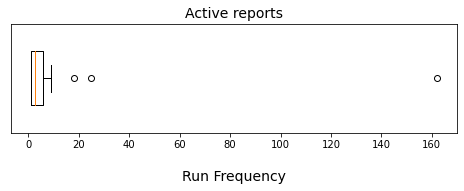

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,2))
plt.boxplot(error_count.ErrorCount.values, vert=False, widths=[.5])
plt.title('Active reports', fontsize=14)
plt.xlabel('\nRun Frequency', fontsize=14)
plt.yticks([])
plt.show()

With this boxplot we can see there are 2 outlier reports with much more errors than the others.

Both mean and standard deviation are too high to consider, if we choose one of them as a threshold we would get a dataset with 2 or 3 results. The median seems more useful in this case.

### Generating datasets

There are 2 options for datasets: the top 5 reports with more errors and the reports with errors above the median. We will generate both and save for future analysis.

In [97]:
top_five = error_count.head(5)
top_five

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6


In [98]:
above_median = error_count[error_count['ErrorCount']>error_count_median]
above_median

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6
5,00O0b000004AnhWEAS,5
6,00O0b000004kTazEAE,3
7,00O2R000004Im5MUAS,3
8,00O0b000004AoOOEA0,3


In [99]:
top_five\
    .to_csv("../../datasets/top_five_problematic_by_errors.csv", index=False)

In [100]:
above_median\
    .to_csv("../../datasets/above_median_problematic_by_errors.csv", index=False)

We can also save the filtered Lightning Error dataset to help with other analysis.

In [101]:
ltng_error_filtered\
    .to_csv("../../datasets/ltng_error_filtered.csv", index=False)